In [1]:
# %matplotlib inline
# %matplotlib notebook

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d as mpl3d
from matplotlib import cm
from scipy import signal
from scipy import stats
from scipy import linalg
from scipy import fft
from scipy import io

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

np.random.seed(123)

In [2]:
def round_power2(num):
    return int(np.power(2., np.ceil(np.log2(num))))


def signal_power(x):
    #     return np.var(x) # one can also use the variance, iff all signals are zero mean
    return sum(abs(x)**2.0) / len(x)


def signal_power_dB(x):
    return 10. * np.log10(signal_power(x))


def snr(a, b):
    return signal_power(a) / signal_power(b)


def snr_dB(a, b):
    return 10. * np.log10(snr(a, b))

In [3]:
def mic_sig(n, fs, fc, fm, fd, dB=0.):
    t = np.arange(n) / fs
    x = np.exp(1.j *
               (2. * np.pi * fc * t + fd / fm * np.sin(2. * np.pi * fm * t)))
    x /= np.std(x)
    x *= 10.**(dB / 20.)
    return x


def awgn(n, dB=0.):
    w = 10.**(dB / 10.)
    d = stats.multivariate_normal(mean=[0., 0.],
                                  cov=[[.5 * w, 0.], [0., .5 * w]])
    x = d.rvs(size=n).view(np.complex128).reshape(N)
    return x

In [4]:
N = round_power2(1e5)
fs = int(1e6)
fc = int(2e5)
fd = 15000.
fm = 3900.

sig = mic_sig(N, fs, fc=fc, fm=fm, fd=fd, dB=3.) + mic_sig(N, fs, fc=fc-1e5, fm=fm+1000, fd=fd, dB=3.)
noise = awgn(N, dB=10.)
both = sig + noise

print('Signal power: %5.2f dB' % (signal_power_dB(sig)))
print('Noise power: %5.2f dB' % (signal_power_dB(noise)))
print('SNR: %5.2f dB' % (snr_dB(sig, noise)))

Signal power:  6.01 dB
Noise power:  9.98 dB
SNR: -3.97 dB


In [5]:
# Matplotlib Spectogram

# plt.figure(figsize=(8, 6))
# plt.specgram(noise,
#              NFFT=1024,
#              Fs=fs,
#              scale='dB',
#              cmap='viridis',
#              noverlap=0,
#              mode='psd',
#              window=signal.get_window('hann', 1024))
# plt.title("PSD")
# plt.xlabel("Time")
# plt.ylabel("Frequency")
# plt.show()

# plt.figure(figsize=(8, 6))
# plt.specgram(sig,
#              NFFT=1024,
#              Fs=fs,
#              scale='dB',
#              cmap='viridis',
#              noverlap=0,
#              mode='psd',
#              window=signal.get_window('hann', 1024))
# plt.title("PSD")
# plt.xlabel("Time")
# plt.ylabel("Frequency")
# plt.show()

# plt.figure(figsize=(8, 6))
# plt.specgram(both,
#              NFFT=1024,
#              Fs=fs,
#              scale='dB',
#              cmap='viridis',
#              noverlap=0,
#              mode='psd',
#              window=signal.get_window('hann', 1024))
# plt.title("PSD")
# plt.xlabel("Time")
# plt.ylabel("Frequency")
# plt.show()

In [6]:
# Scipy Welch (Periodigram with averaging and overlap, which is currently 0)

# plt.figure(figsize=(8, 6))
# f, Pxx_den = signal.welch(noise,
#                           fs,
#                           nperseg=1024,
#                           noverlap=0,
#                           window='hann',
#                           scaling='density',
#                           detrend=False)
# plt.semilogy(fft.fftshift(f), fft.fftshift(Pxx_den))
# plt.xlabel('Frequency [Hz]')
# plt.ylabel('PSD [V**2/Hz]')
# plt.show()

# plt.figure(figsize=(8, 6))
# f, Pxx_den = signal.welch(sig,
#                           fs,
#                           nperseg=1024,
#                           noverlap=0,
#                           window='hann',
#                           scaling='density',
#                           detrend=False)
# plt.semilogy(fft.fftshift(f), fft.fftshift(Pxx_den))
# plt.xlabel('Frequency [Hz]')
# plt.ylabel('PSD [V**2/Hz]')
# plt.show()

# plt.figure(figsize=(8, 6))
# f, Pxx_den = signal.welch(both,
#                           fs,
#                           nperseg=1024,
#                           noverlap=0,
#                           window='hann',
#                           scaling='density',
#                           detrend=False)
# plt.semilogy(fft.fftshift(f), fft.fftshift(Pxx_den))
# plt.xlabel('Frequency [Hz]')
# plt.ylabel('PSD [V**2/Hz]')
# plt.show()

In [7]:
# Scipy Periodigram (Welch without averaging and 0 overlap)

# plt.figure(figsize=(8, 6))
# f, Pxx_den = signal.periodogram(noise,
#                                 fs,
#                                 window='hann',
#                                 nfft=1024,
#                                 scaling='density',
#                                 detrend=False)
# plt.semilogy(fft.fftshift(f), fft.fftshift(Pxx_den))
# plt.xlabel('frequency [Hz]')
# plt.ylabel('PSD [V**2/Hz]')
# plt.show()

# plt.figure(figsize=(8, 6))
# f, Pxx_den = signal.periodogram(sig,
#                                 fs,
#                                 window='hann',
#                                 nfft=1024,
#                                 scaling='density',
#                                 detrend=False)
# plt.semilogy(fft.fftshift(f), fft.fftshift(Pxx_den))
# plt.xlabel('frequency [Hz]')
# plt.ylabel('PSD [V**2/Hz]')
# plt.show()

# plt.figure(figsize=(8, 6))
# f, Pxx_den = signal.periodogram(both,
#                                 fs,
#                                 window='hann',
#                                 nfft=1024,
#                                 scaling='density',
#                                 detrend=False)
# plt.semilogy(fft.fftshift(f), fft.fftshift(Pxx_den))
# plt.xlabel('frequency [Hz]')
# plt.ylabel('PSD [V**2/Hz]')
# plt.show()

In [8]:
# Scipy Spectogram (Periodigram over time)

# plt.figure(figsize=(8, 6))
# f, t, Sxx = signal.spectrogram(noise,
#                                fs,
#                                return_onesided=False,
#                                window='boxcar',
#                                nperseg=1024,
#                                nfft=1024,
#                                noverlap=0,
#                                detrend=False,
#                                scaling='density',
#                                mode='psd')
# plt.pcolormesh(t,
#                fft.fftshift(f),
#                fft.fftshift(Sxx, axes=0),
#                shading='gouraud')
# plt.ylabel('Frequency [Hz]')
# plt.xlabel('Time [sec]')
# plt.show()

# plt.figure(figsize=(8, 6))
# f, t, Sxx = signal.spectrogram(sig,
#                                fs,
#                                return_onesided=False,
#                                window='boxcar',
#                                nperseg=1024,
#                                nfft=1024,
#                                noverlap=0,
#                                detrend=False,
#                                scaling='density',
#                                mode='psd')
# plt.pcolormesh(t,
#                fft.fftshift(f),
#                fft.fftshift(Sxx, axes=0),
#                shading='gouraud')
# plt.ylabel('Frequency [Hz]')
# plt.xlabel('Time [sec]')
# plt.show()

# plt.figure(figsize=(8, 6))
# f, t, Sxx = signal.spectrogram(both,
#                                fs,
#                                return_onesided=False,
#                                window='boxcar',
#                                nperseg=1024,
#                                nfft=1024,
#                                noverlap=0,
#                                detrend=False,
#                                scaling='density',
#                                mode='psd')
# plt.pcolormesh(t,
#                fft.fftshift(f),
#                fft.fftshift(Sxx, axes=0),
#                shading='gouraud')
# plt.ylabel('Frequency [Hz]')
# plt.xlabel('Time [sec]')
# plt.show()

In [9]:
# def get_fft_psd(sig, fs, N):
#     assert N == len(sig) 
#     f_tmp = fft.fftfreq(N, 1. / fs)
#     f = fft.fftshift(f_tmp)
#     x_tmp = fft.fft(sig)
#     x = fft.fftshift(x_tmp)
#     x = np.abs(x)**2. / (N * fs)
#     return f, x


# def get_energy_from_psd(psd):
#     return np.sum(psd)


# def get_power_from_psd(psd, f):
#     df = f[1] - f[0]
#     return np.sum(psd) * df

In [10]:
# power_sig_time = signal_power(sig)
# energy_sig_time_from_power_sig_time = power_sig_time * N * 1. / fs  # where 1./fs=dt and T=(N*1./fs)
# print('Signal power in time %8.6f' % (power_sig_time))
# print('Signal energy in time from signal power in time %8.6f' %
#       (energy_sig_time_from_power_sig_time))

# plt.figure(figsize=(8, 6))
# f, psd = get_fft_psd(sig, fs, N)
# plt.semilogy(f, psd)
# plt.show()

# print('Signal power from psd %8.6f' % (get_power_from_psd(psd, f)))
# print('Signal energy from psd %8.6f' % (get_energy_from_psd(psd)))

In [11]:
# window_size = 1024

# plt.figure(figsize=(8, 6))
# f_welch, psd_welch = signal.welch(sig,
#                                   fs,
#                                   window='flattop',
#                                   nperseg=window_size,
#                                   noverlap=0,
#                                   nfft=window_size,
#                                   detrend=False,
#                                   scaling='density',
#                                   return_onesided=False)
# f_welch = fft.fftshift(f_welch)
# psd_welch = fft.fftshift(psd_welch)
# plt.figure(figsize=(8, 6))
# plt.semilogy(f_welch, psd_welch)
# plt.show()

# df_welch = f_welch[1] - f_welch[0]
# welch_power = np.sum(psd_welch) * df_welch
# print('Signal power from welch %8.6f' % (welch_power))

# welch_energy = welch_power * 1./fs * window_size
# print('Signal energy from welch %8.6f' % (welch_energy))

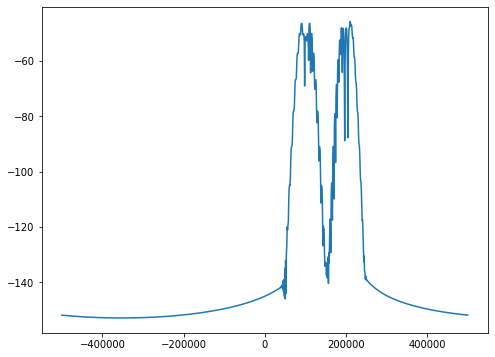

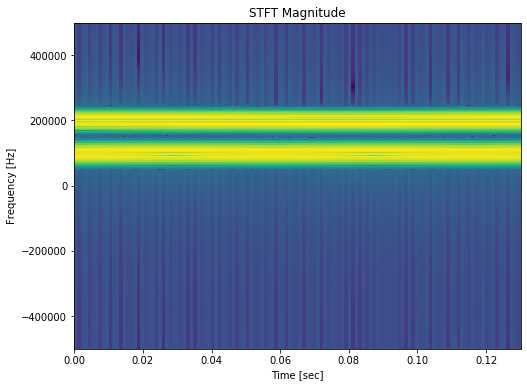

In [24]:

class Stft:
    
    def __init__(self, n=1024, window='flattop'):
        assert self.is_power2(n)
        self.n = n
        self.window = window
        
    def is_power2(self, n):
        '''Check least significant bit for power of two.'''
        return (n != 0) and (n & (n-1) == 0)
    
    def fft(self, sig, fs):
        f = fft.fftshift(fft.fftfreq(len(sig), 1. / fs))
        p = fft.fftshift(fft.fft(sig))
        return f, p

    def apply_window(self, sig):
        return sig * signal.get_window(self.window, len(sig))
    
    def stft_helper(self, sig, fs):
        return self.fft(self.apply_window(sig), fs)
    
    def stft(self, sig, fs):
        segs = [sig[i:i + self.n] for i in range(0, len(sig), self.n)]
        for i in segs:
            f, x = self.stft_helper(i, fs)
            yield f, x
            
    def apply_psd(self, sig, fs):
        return np.abs(sig)**2. / (len(sig) * fs)

    def dB(self, psd):
        return 10. * np.log10(psd)

    def psd(self, sig, fs):
        for f, x in self.stft(sig, fs):
            yield f, self.apply_psd(x, fs)
        
    def spectogram(self, sig, fs):
        tl = list()
        xl = list()
        i = 0
        for f, x in self.psd(sig, fs):
            tl.append(i*self.n*1./fs)
            i += 1
            xl.append(self.dB(x))
        xl = np.swapaxes(xl, 0, 1)
        return f, tl, xl
        
        
#     def stft(self, sig, fs):
#         for i in range(0, len(sig), self.n):
#             yield self.stft_helper(sig[i:i + self.n], fs)
            
#     def psd(self, sig, fs):
#         for f, t in self.stft(sig, fs):
#             yield (lambda f, t: (self.apply_psd(f, fs), t))(f, t)
    
#     def cut(self, sig):
#         return [sig[i:i + self.n] for i in range(0, len(sig), self.n)]
    
#     def tmp(self, sig, fs):
#         return list(map(lambda x: self.stft_helper(x, fs), self.cut(sig)))


sft = Stft(n=1024, window='flattop')

# for f, t in sft.psd(sig, fs):
#     plt.figure(figsize=(8, 6))
#     plt.semilogy(f, t)
#     plt.show()

f, t, x = sft.spectogram(sig, fs)

plt.figure(figsize=(8, 6))
plt.plot(f, x[:, 2])
plt.show()

plt.figure(figsize=(8, 6))
plt.pcolormesh(t,
               f,
               x,
               shading='flat',
               cmap='viridis',
               snap=True,
               vmin=np.min(x),
               vmax=np.max(x))
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()


# s = list(sft.stft(sig, fs))

# t = sft.tmp(sig, fs)

# print(t)

# plt.figure(figsize=(8, 6))
# plt.semilogy(t[0])
# plt.show()

# for f, t in sft.stft(sig, fs):
#     plt.figure(figsize=(8, 6))
#     plt.semilogy(f, t)
#     plt.show()


# sig_here = sig[1024:2048]

# print(sig_here)

# f, t = sft.fft(sig_here, fs)
# # f, t = get_fft_psd(sig_here, fs, 1024)

# # f, psd = get_fft_psd(sig_here, fs, N_here)

# t = np.abs(t)**2. / (len(t) * fs)

# plt.figure(figsize=(8, 6))
# plt.semilogy(f, t)
# plt.show()

# df = f[1] - f[0]
# power = np.sum(psd) * df
# print('Signal power %8.6f' % (power))

# chunks = [sig[x:x+100] for x in range(0, len(sig), 100)]

In [13]:
def get_stft_psd(sig, fs):
    f, t, psd = signal.stft(sig,
                            fs,
#                             window='box',
                            signal.get_window('flattop', 1024, False),
                            nperseg=1024,
                            noverlap=0,
                            nfft=1024,
                            detrend=False,
                            return_onesided=False)
    f = fft.fftshift(f)
    psd = fft.fftshift(psd, axes=0)
    psd = np.abs(psd)**2.
    return f, t, psd


def get_dB(psd):
    return 10. * np.log10(psd)


def get_power_from_stft(psd, f, t):
    return np.sum(psd)


def get_energy_from_stft(psd, f, t):
    dt = t[-1] - t[0]
    return np.sum(psd) * dt

In [14]:
# #3.99

# f, t, psd = get_stft_psd(sig, fs) 

# # print('Signal energy from stft %8.6f' % (get_energy_from_stft(psd, f, t)))
# # print('Signal energy corr from stft %8.6f' % (get_energy_from_stft(psd, f, t)*(1.63**2)))
# # print('Signal power from stft %8.6f' % (get_power_from_stft(psd, f, t)))
# # print('Signal power corr from stft %8.6f' % (get_power_from_stft(psd, f, t)*(1.63)))

# plt.figure(figsize=(8, 6))
# plt.semilogy(psd[:, 30])
# plt.show()

# # print(np.sum(psd[:, 100])/3.77)
# print(np.sum(psd[:, 30]))

# w = signal.get_window('hann', 4096, False)
# plt.figure(figsize=(8, 6))
# plt.plot(w)
# corr = 1/(np.sqrt(np.sum(np.abs(w)**2) / 4096))
# print(corr)
# w = signal.get_window('flattop', 4096, True)
# plt.plot(w)
# plt.show()
# corr = 1/(np.sqrt(np.sum(np.abs(w)**2) / 1024))
# print(corr)

# # g = np.sum(psd, axis=0)
# # plt.figure(figsize=(8, 6))
# # plt.plot(g)
# # plt.show()

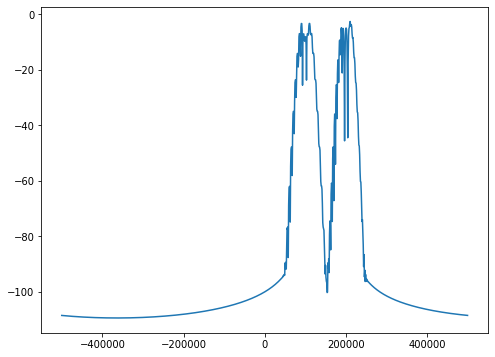

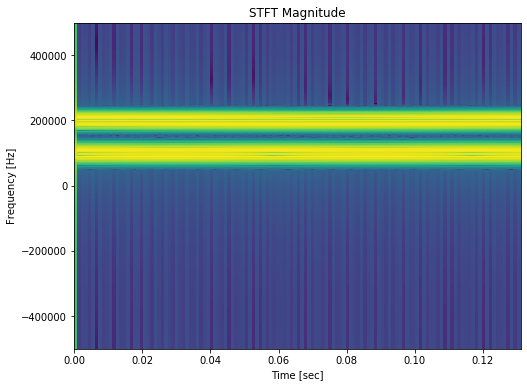

In [19]:
# f, t, psd = get_stft_psd(noise, fs)
# psd = get_dB(psd)
# plt.figure(figsize=(8, 6))
# plt.pcolormesh(t,
#                f,
#                psd,
#                shading='flat',
#                cmap='viridis',
#                vmin=np.min(psd),
#                vmax=np.max(psd))
# plt.title('STFT Magnitude')
# plt.ylabel('Frequency [Hz]')
# plt.xlabel('Time [sec]')
# plt.show()

f, t, psd = get_stft_psd(sig, fs)
psd = get_dB(psd)

plt.figure(figsize=(8, 6))
plt.plot(f, psd[:, 2])
plt.show()

plt.figure(figsize=(8, 6))
plt.pcolormesh(t,
               f,
               psd,
               shading='flat',
               cmap='viridis',
               snap=True,
               vmin=np.min(psd),
               vmax=np.max(psd))
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

# f, t, psd = get_stft_psd(both, fs)
# psd = get_dB(psd)
# plt.figure(figsize=(8, 6))
# plt.pcolormesh(t,
#                f,
#                psd,
#                shading='flat',
#                cmap='viridis',
#                vmin=np.min(psd),
#                vmax=np.max(psd))
# plt.title('STFT Magnitude')
# plt.ylabel('Frequency [Hz]')
# plt.xlabel('Time [sec]')
# plt.show()

In [16]:
# import scipy.ndimage

# def clip_2d(x, lim_min, lim_max):
#     (x, y) = np.shape(Sxx)
#     for i in range(x):
#         for j in range(y):
#             Sxx[i, j] = max(min(Sxx[i, j], lim_max), lim_min)
#     return Sxx

# def smooth_2d(x, sigma):
#     return scipy.ndimage.filters.gaussian_filter(x, [sigma, sigma], mode='mirror')

# def crop_2d(Sxx, f, t, n):
#     Sxx = Sxx[n:-n, n:-n]
#     f = f[n:-n]
#     t = t[n:-n]
#     return Sxx, f, t

In [17]:
# f, t, Sxx = signal.spectrogram(both, fs, return_onesided=False, window='hann', nperseg=1024, nfft=1024, noverlap=0, detrend=False, scaling='density', mode='psd')

# f = fft.fftshift(f)
# Sxx = fft.fftshift(Sxx, axes=0)

# Sxx = 10.0*np.log10(Sxx)
# Sxx = clip_2d(Sxx, -60, 0)
# Sxx = smooth_2d(Sxx, 2)
# # Sxx, f, t = crop_2d(Sxx, f, t, 4)

# fig = plt.figure(figsize=(12,12))
# ax = fig.gca(projection='3d')
# # ax.get_proj = lambda: np.dot(mpl3d.axes3d.Axes3D.get_proj(ax), np.diag([1, 1, 0.5, 1]))
# ax.plot_surface(f[:, None], t[None, :], Sxx, cmap='viridis', rstride=1, cstride=1, alpha=1, antialiased=True)
# ax.view_init(elev=30, azim=70)
# plt.show()
# plt.savefig('test.png')  